In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

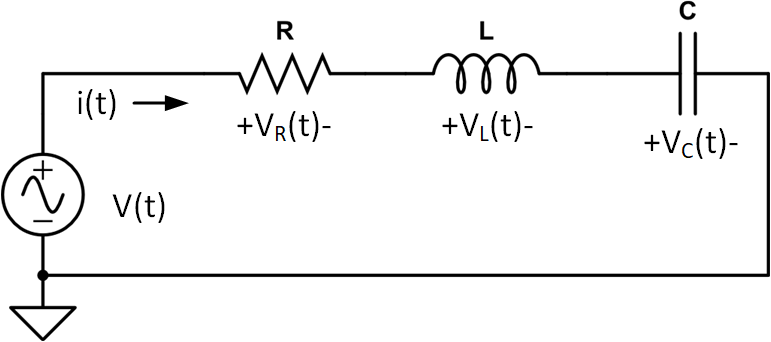

In [11]:
def acplot(Vm, f, φ, R, L, C, showVr, showVl, showVc, showP):
    ω = 2*np.pi*f
    φ *= np.pi/180
    L *= 1e-3
    C *= 1e-6
    t = np.linspace(0, 0.04, 100)
    V = Vm*np.exp(1j*φ)
    Z = R + 1j*ω*L - 1j/(ω*C) if C > 0 else R + 1j*ω*L
    I = V/Z if np.abs(Z) > 0 else 0
    Vr = I*R
    Vl = I*1j*ω*L
    Vc = -I*1j/(ω*C) if C > 0 else 0
    v = Vm*np.cos(ω*t+φ)
    i = np.abs(I)*np.cos(ω*t+np.angle(I))
    vr = np.abs(Vr)*np.cos(ω*t+np.angle(Vr))
    vl = np.abs(Vl)*np.cos(ω*t+np.angle(Vl))
    vc = np.abs(Vc)*np.cos(ω*t+np.angle(Vc))
    plt.figure(figsize=(20, 10))
    g = plt.GridSpec(1, 5)
    ax = plt.subplot(g[0,0:3])
    ax.plot(t, v, 'b', label='V(t) = Vm cos(ωt + φ)')
    ax.plot(t, 1000*i, 'g:', label='i(t)')
    if showVr:
        ax.plot(t, vr, 'r', label='vR(t)')
    if showVl:
        ax.plot(t, vl, 'y', label='vL(t)')
    if showVc:
        ax.plot(t, vc, 'm', label='vC(t)')
    if showP:
        ax.plot(t, 1000*v*i, 'k--', label='Power consumed')
    plt.xlabel('Time (seconds)', fontsize=18)
    plt.ylabel('Voltage (V) / Current (mA) / Power (mW)', fontsize=18)
    ax.axis([0, 0.04, -10, 10])
    ax.grid()
    ax.legend(fontsize=18)
    ax = plt.subplot(g[0,3:5])
    ax.plot([0, V.real], [0, V.imag], 'b', label='V')
    ax.plot(0, 0, 'ko')
    ax.plot(V.real, V.imag, 'bo')
    ax.text((1.1*V).real, (1.1*V).imag, 'V', fontsize=18, color='b')
    ax.plot([0, 1000*I.real], [0, 1000*I.imag], 'g', label='I')
    ax.plot(1000*I.real, 1000*I.imag, 'gs')
    ax.text(1000*I.real+0.25, 1000*I.imag-0.5, 'I', fontsize=18, color='g')
    if showVr:
        ax.plot([0, Vr.real], [0, Vr.imag], 'r', label='VR')
        ax.plot(Vr.real, Vr.imag, 'ro')
        ax.text(Vr.real+0.25, Vr.imag-0.5, 'VR', fontsize=18, color='r')
    if showVl:
        ax.plot([0, Vl.real], [0, Vl.imag], 'y', label='VL')
        ax.plot(Vl.real, Vl.imag, 'yo')
        ax.text(Vl.real, Vl.imag+0.5, 'VL', fontsize=18, color='y')
    if showVc:
        ax.plot([0, Vc.real], [0, Vc.imag], 'm', label='VC')
        ax.plot(Vc.real, Vc.imag, 'mo')
        ax.text(Vc.real, Vc.imag+0.5, 'VC', fontsize=18, color='m')
    if showVr and showVl and showVc:
        ax.plot([Vc.real, Vc.real+Vr.real], [Vc.imag, Vc.imag+Vr.imag], 'r:')
        ax.plot([Vc.real+Vr.real, Vc.real+Vr.real+Vl.real], [Vc.imag+Vr.imag, Vc.imag+Vr.imag+Vl.imag], 'y:')
    ax.axis([-7, 7, -7, 7])
    ax.set_aspect('equal', 'box')
    ax.grid()
    plt.show()

In [12]:
interact(acplot,
         Vm = widgets.FloatSlider(value=5, min=0, max=10, step=1, description='Vm (V)', readout_format='.0f'),
         f = widgets.FloatSlider(value=50, min=0, max=100, step=10, description='f (Hz)', readout_format='.0f'),
         φ = widgets.FloatSlider(value=0, min=-180, max=180, step=22.5, description='φ (degrees)', readout_format='.1f'),
         R = widgets.FloatSlider(value=2500, min=0, max=5000, step=100, description='R (Ω)', readout_format='.0f'),
         L = widgets.FloatSlider(value=1000, min=0, max=5000, step=100, description='L (mH)', readout_format='.0f'),
         C = widgets.FloatLogSlider(value=2, base=10, min=-2, max=3, step=0.1, description='C (μF)', readout_format='.2f'),
         showVr = widgets.Checkbox(value=False, description='Show VR'),
         showVl = widgets.Checkbox(value=False, description='Show VL'),
         showVc = widgets.Checkbox(value=False, description='Show VC'),
         showP = widgets.Checkbox(value=False, description='Show total power consumed')
        );

interactive(children=(FloatSlider(value=5.0, description='Vm (V)', max=10.0, readout_format='.0f', step=1.0), …